## Exercise "Natural Language Processing" -- Text Mining

---



For this course, save a COPY to your Google Drive for the tutorial (File -> Save copy in Drive). Then complete the tasks in your saved copy. If you're done, submit the notebook via moodle by sharing a link with the appropriate permissions (preferred, but please do not make changes after the deadline) or by submitting the downloaded `.ipynb` file.

This is an individual assignment, i.e., submit your solutions individually.
This assignment is **ungraded/optional**.

Due date: 04.05.2023, 9:15 a.m.(CEST)


## Text mining on "1984" by George Orwell
For this assignment, you will be working with the text of the book "1984" by George Orwell. Get the data you need from [this link](https://gutenberg.net.au/ebooks01/0100021.txt). 

Alternatively, use the following code for getting the data. The resulting text file will be downloaded to the current working directory (`./0100021.txt`).




In [2]:
# We can execute `bash` commands in Colab by prepending a `!`
!wget https://gutenberg.net.au/ebooks01/0100021.txt

--2023-05-02 09:33:29--  https://gutenberg.net.au/ebooks01/0100021.txt
Resolving gutenberg.net.au (gutenberg.net.au)... 203.210.102.143
Connecting to gutenberg.net.au (gutenberg.net.au)|203.210.102.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 588097 (574K) [text/plain]
Saving to: ‘0100021.txt’

0100021.txt         100%[===================>] 574.31K   583KB/s    in 1.0s    

2023-05-02 09:33:31 (583 KB/s) - ‘0100021.txt’ saved [588097/588097]



**TASK 1:** Write a function that mines the text and outputs the name of the *title*, *author (with the pseudonym)*, *date of the author's death*, *language* and *last sentence* of the book. 

Make sure that the outputs are clean and do no include any extra unrequired characters. The last sentence is supposed to be the last sentence of the book *content* not the last sentence of the provided text file.

In [3]:
def _title(book) -> str:
  with open(book, 'r') as file:
    for line in file:
        if line.startswith('Title:'):
            title = line[len('Title:'):].strip()
            break
    return title

def _author(book) -> str:
  with open(book, 'r') as file:
    for line in file:
       if line.startswith('Author:'):
            line_parts = line[len('Author:'):].strip().split()
            author = ' '.join(line_parts[0:6])
            break
    return author

def _author_death_date(book) -> int:
  with open(book, 'r') as file:
    for line in file:
       if line.startswith('Author:'):
            line_parts = line[len('Author:'):].strip().split()
            years = ' '.join(line_parts[6:])
            dates= years.strip("()").split("-")
            death_date = dates[1]
            break
    return death_date

def _language(book) -> str:
  with open(book, 'r') as file:
    for line in file:
        if line.startswith('Language:'):
            title = line[len('Language:'):].strip()
            break
    return title

def _last_sentence(book) -> str:
  with open(book, 'r') as file:
    lines = file.read().splitlines()
    end_index = 0
    while lines[end_index] != 'THE END':
      end_index += 1
  last_index = end_index - 1
  while not lines[last_index].strip():
    last_index -= 1
  last_index -= 10
  last_sentence = ''
  for line in lines[last_index:end_index]:
      last_sentence += line.strip() + ' '
  last_sentence = last_sentence.strip().split('. ')[-1]
  return last_sentence


def get_information(book):
  title = _title(book)
  author = _author(book)
  author_death_date = _author_death_date(book)
  language = _language(book)
  last_sentence = _last_sentence(book)

  return title, author, author_death_date, language, last_sentence

In [4]:
get_information("0100021.txt")

('Nineteen eighty-four',
 'George Orwell (pseudonym of Eric Blair)',
 '1950',
 'English',
 'He loved Big Brother.')

**TASK 2:** This book has **23** chapters. How can we extract the text for each chapter in the book? Implement this and load the result into any appropriate data structure (e.g. a list `["<text chapter 1>", "<text chapter 2>", ...]` or a dict `{"chapter1": "...", "chapter2": "..."}`). *Note*: There are multiple parts in the book where the chapter counter re-starts from 1. You can deal with this however you like, but make sure to properly separate these chapters. Dealing with real-world text data is always messy!



In [5]:
def separate_chapters(book):
  with open(book, 'r') as file:
    lines = file.read().splitlines()

  chapters = {}

# Iterate over the lines and extract the chapters
  current_chapter = None
  current_text = []
  chapter_counts = {}
  for line in lines:
    line = line.strip()
    if line.startswith("Chapter ") and line.split()[1].isdigit():
      if current_chapter is not None:
        if current_chapter in chapters:
          chapters[current_chapter]+= " ".join(current_text)
        else:
          chapters[current_chapter] = " ".join(current_text)
      current_text= []
      chapter_num = line.split()[-1]
      if chapter_num in chapter_counts:
        chapter_counts[chapter_num] += 1
        current_chapter = f"chapter{chapter_num}.{chapter_counts[chapter_num]}"
      else:
        current_chapter = f"chapter{chapter_num}"
        chapter_counts[chapter_num] = 1
    elif not line:
      if current_chapter is not None and current_text:
        if current_chapter in chapters:
                chapters[current_chapter] += " ".join(current_text)
        else:
                chapters[current_chapter] = " ".join(current_text)
        current_text = []
    elif line == "THE END":
      chapters[current_chapter] += " ".join(current_text)
      break
    elif current_chapter is not None:
      current_text.append(line)
  return chapters

In [ ]:
separate_chapters("0100021.txt")

{'chapter1': "It was a bright cold day in April, and the clocks were striking thirteen. Winston Smith, his chin nuzzled into his breast in an effort to escape the vile wind, slipped quickly through the glass doors of Victory Mansions, though not quickly enough to prevent a swirl of gritty dust from entering along with him.The hallway smelt of boiled cabbage and old rag mats. At one end of it a coloured poster, too large for indoor display, had been tacked to the wall. It depicted simply an enormous face, more than a metre wide: the face of a man of about forty-five, with a heavy black moustache and ruggedly handsome features. Winston made for the stairs. It was no use trying the lift. Even at the best of times it was seldom working, and at present the electric current was cut off during daylight hours. It was part of the economy drive in preparation for Hate Week. The flat was seven flights up, and Winston, who was thirty-nine and had a varicose ulcer above his right ankle, went slowly

**TASK 3:** Tokenize the text in each chapter with the simple "whitespace-split" tokenizer and again with a more advanced tokenizer (either your own or from a package, e.g., NLTK or SpaCy).

1. Complete the tokenizer.

2. How many tokens exist in the *vocabulary* created using all the chapters? Are the numbers different when using whitespace-split versus your advanced approach?

3. Which chapters are the *top-5 longest chapters*, i.e., chapters that have the most number of tokens?

4. Which tokens are the *top-5 most frequent* tokens for the longest chapter in both cases?



In [9]:
import re   # hint
import nltk
nltk.download('punkt')

class Tokenizer:
  def __init__(self):
    return
  
  def tokenize_with_whitespace(self, text):
    return re.split("\s+", text)
  
  def tokenize_advanced(self, text):
    return nltk.word_tokenize(text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [10]:
# Run the following test case to make sure your imlpementation in correct
myTokenizer = Tokenizer()

test1 = 'This is the first tutorial of NLP'
test2 = 'This is the first        tutorial of NLP'
expected_result = ['This', 'is', 'the', 'first', 'tutorial', 'of', 'NLP']

assert myTokenizer.tokenize_with_whitespace(test1) == expected_result
assert myTokenizer.tokenize_with_whitespace(test2) == expected_result
assert myTokenizer.tokenize_advanced(test1) == expected_result
assert myTokenizer.tokenize_advanced(test1) == expected_result


test3 = 'This is the first tutorial of NLP!'
expected_result = ['This', 'is', 'the', 'first', 'tutorial', 'of', 'NLP!']
advanced_expected_result = ['This', 'is', 'the', 'first', 'tutorial', 'of', 'NLP', '!']

assert myTokenizer.tokenize_with_whitespace(test3) == expected_result
assert myTokenizer.tokenize_advanced(test3) == advanced_expected_result

In [11]:
def vocabulary(chapters, tokenizer, with_advanced_tokenizer=False):
  vocabulary = {}
 
  if type(chapters) == dict:
   for i in chapters:
      if with_advanced_tokenizer:
        tokenized = tokenizer.tokenize_advanced(chapters[i])
      else:
        tokenized = tokenizer.tokenize_with_whitespace(chapters[i])
      for j in tokenized:
        if j not in vocabulary:
          vocabulary[j] = 1
        else:
          vocabulary[j] += 1
  elif type(chapters) == str:
    if with_advanced_tokenizer:
      tokenized = tokenizer.tokenize_advanced(chapters)
    else:
      tokenized = tokenizer.tokenize_with_whitespace(chapters)
    for j in tokenized:
      if j not in vocabulary:
        vocabulary[j] = 1
      else:
        vocabulary[j] += 1

  return vocabulary

# vocab_length = len(vocabulary(chapters))

def longest_chapters(chapters, tokenizer, n=5, with_advanced_tokenizer=False):
  length = {}
  for i in chapters:
    if with_advanced_tokenizer:
      tokenized = tokenizer.tokenize_advanced(chapters[i])
    else:
      tokenized = tokenizer.tokenize_with_whitespace(chapters[i])
    length[i] = len(tokenized)

  return sorted(length, key=length.get, reverse=True)[:n]

def frequent_tokens(chapters, tokenizer, n=5, with_advanced_tokenizer=False):
  longest_chapter_key = longest_chapters(chapters, tokenizer, 1, with_advanced_tokenizer)[0]
  frequent_tokens = vocabulary(chapters[longest_chapter_key], tokenizer, with_advanced_tokenizer)

  return sorted(frequent_tokens, key=frequent_tokens.get, reverse=True)[:n]

In [ ]:
vocabulary(separate_chapters("0100021.txt"),myTokenizer)

**From this point, only use the top-5 longest chapters.**

**TASK 4**: In this task, you are required to calculate the chapter similarities.

1. Use the advanced tokenizer to construct Bag-of-Words models for each of the 5
chapters. You can choose the data structure (e.g. `dict`).

2. Calculate the cosine similarities for each chapter pair. Use a heatmap visualisation to show the pair-wise cosine similarities of chapters.

Expected output: A 5x5 heatmap and the cosine values. You can use the `seaborn` libray for visualisation. Optional: You can annotate each cell in the heatmap with the corresponding cosine values.

In [15]:
from collections import Counter  # hint
from collections import OrderedDict

chapters = separate_chapters("0100021.txt")
tokenizer = myTokenizer
bag_of_words = {}
voc = vocabulary(chapters, tokenizer, True)
for i in longest_chapters(chapters,tokenizer,5, True,):
  chap_voc = vocabulary(chapters[i], tokenizer, True)
  for j in voc:
    if j not in chap_voc:
      chap_voc[j] = 0
  chap_voc_sort = OrderedDict(sorted(chap_voc.items()))
  bag_of_words[i] = Counter(chap_voc_sort)

bag_of_words

{'chapter9': Counter({'!': 12,
          "'": 42,
          "''": 5,
          "'2713": 0,
          "'6079": 0,
          "'AS": 0,
          "'Abruptly": 0,
          "'Actually": 0,
          "'Again": 0,
          "'Ah": 0,
          "'All": 0,
          "'Already": 0,
          "'Always": 0,
          "'Ampleforth": 0,
          "'An": 0,
          "'And": 1,
          "'Another": 0,
          "'Anyone": 0,
          "'Arms": 0,
          "'As": 1,
          "'Ashes": 0,
          "'At": 0,
          "'Attention": 0,
          "'Ave": 0,
          "'Bad": 0,
          "'Beg": 0,
          "'Black": 0,
          "'Bring": 0,
          "'But": 0,
          "'By": 0,
          "'Ca": 0,
          "'Can": 0,
          "'Come": 0,
          "'Death": 0,
          "'Did": 0,
          "'Do": 1,
          "'Does": 0,
          "'English": 0,
          "'Even": 0,
          "'Everyone": 0,
          "'Everything": 0,
          "'Exactly": 0,
          "'Except": 0,
          "'Excuse": 1,

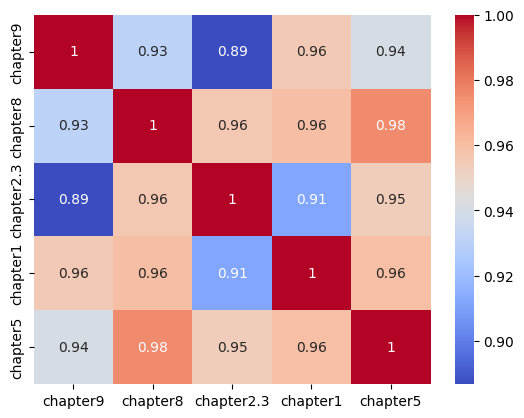

In [16]:
from seaborn import heatmap  # hint
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

chapter_vectors = np.array([list(chapter.values()) for chapter in bag_of_words.values()])
cos_sim = cosine_similarity(chapter_vectors)
heatmap(cos_sim, annot=True, cmap='coolwarm', xticklabels=bag_of_words.keys(), yticklabels=bag_of_words.keys())
plt.show()


**TASK 5**: Construct a WordCloud for each of the 5 chapters and visualize it.
Use the `wordcloud` package.

If chapters are too long, use your tokenizer and prune the text by keeping only the freuquent tokens. E.g., remove the tokens that occur < 10 times.

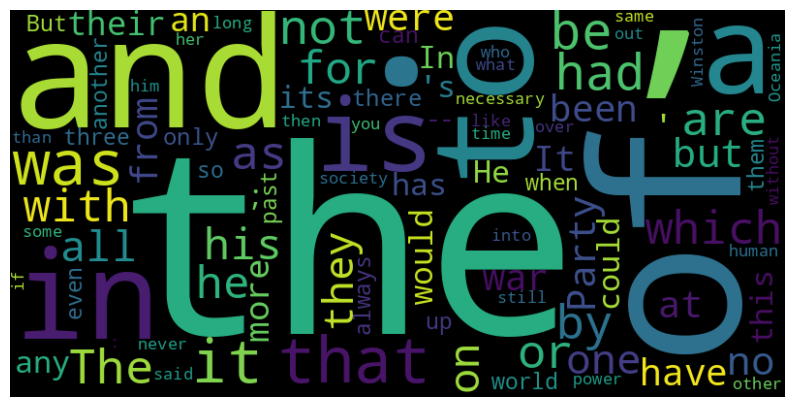

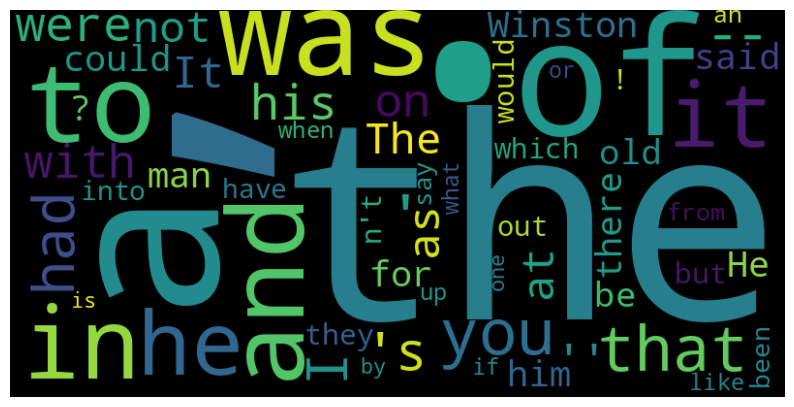

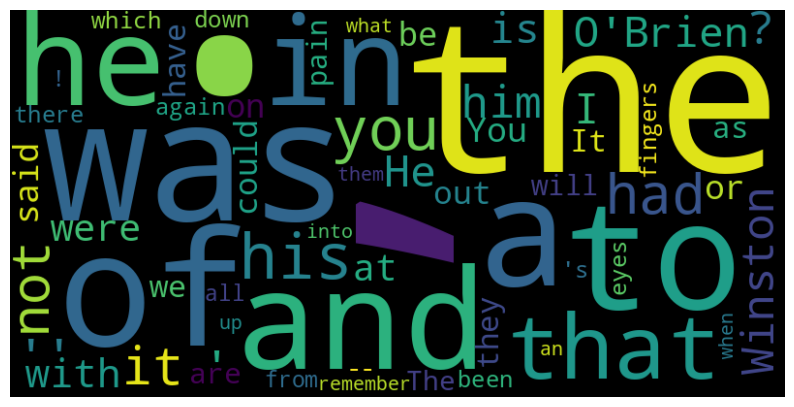

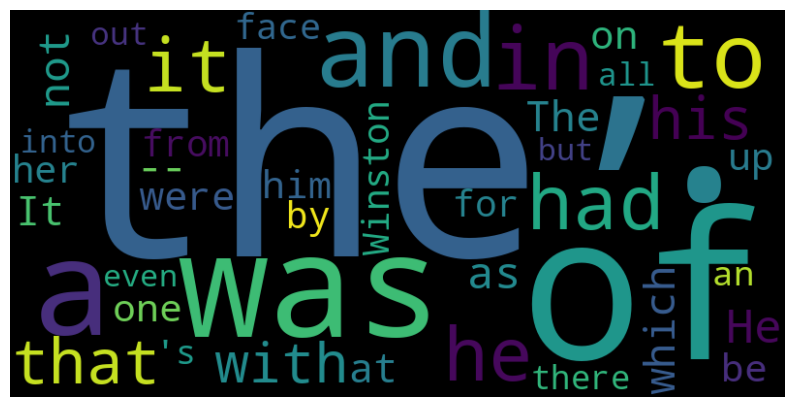

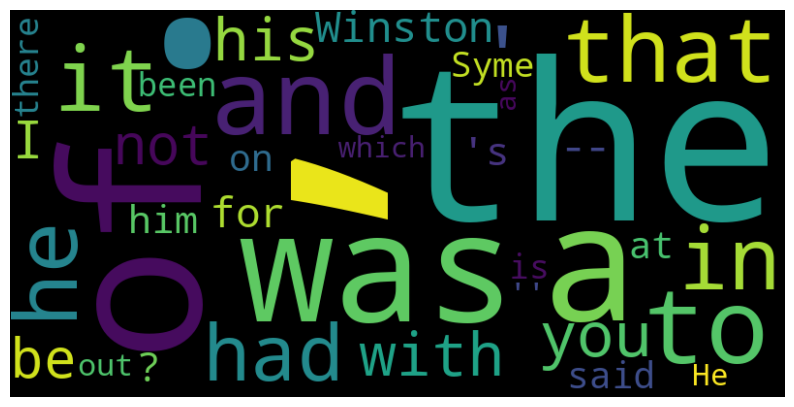

In [17]:
from wordcloud import WordCloud

for i in bag_of_words:

  word_counts = bag_of_words[i]
  for key, cnts in list(word_counts.items()):
    if cnts < 20:
        del word_counts[key]
  wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_counts)
  plt.figure(figsize=(10,10))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()